# Credit Card Approval Prediction

Credit score cards are a common risk control method in the financial industry. It uses personal information and data submitted by credit card applicants to predict the probability of future defaults and credit card borrowings. The bank is able to decide whether to issue a credit card to the applicant. Credit scores can objectively quantify the magnitude of risk.

### All Imports 

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
from tqdm import tqdm
from matplotlib.font_manager import FontProperties

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split


import matplotlib.style as style
import matplotlib.pyplot as plt
from matplotlib import colors
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from IPython.display import Image
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.offline as pyo
from plotly import tools
import seaborn as sns

import missingno as msno #to visualize missing data

from imblearn.over_sampling import SMOTE
import itertools

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,recall_score,roc_auc_score,f1_score,roc_curve
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import LabelEncoder #label encoding for categorical columns



import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 6)
app_df = pd.read_csv("./application_record.csv")
app_df.head(10)

,ID,CODE_GENDER,FLAG_OWN_CAR,...,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,...,0,NaN,2.0
1,5008805,M,Y,...,0,NaN,2.0
2,5008806,M,Y,...,0,Security staff,2.0
3,5008808,F,N,...,1,Sales staff,1.0
4,5008809,F,N,...,1,Sales staff,1.0
5,5008810,F,N,...,1,Sales staff,1.0
6,5008811,F,N,...,1,Sales staff,1.0
7,5008812,F,N,...,0,NaN,1.0
8,5008813,F,N,...,0,NaN,1.0
9,5008814,F,N,...,0,NaN,1.0


| Feature Name         | Explanation                      |
|:--------------------:|:--------------------------------:|
| ID                   | Client number                    |
| CODE_GENDER          | Gender                           |
| FLAG_OWN_CAR         | Is there a car                   |
| FLAG_OWN_REALTY      | Is there a property              |
| CNT_CHILDREN         | Number of children               |
| AMT_INCOME_TOTAL     | Annual income                    |
| NAME_INCOME_TYPE     | Income category                  |
| NAME_EDUCATION_TYPE  | Education level                  |
| NAME_FAMILY_STATUS   | Marital status                   |
| NAME_HOUSING_TYPE    | Way of living                    |
| DAYS_BIRTH           | Birthday                         |
| DAYS_EMPLOYED        | Start date of employment         |
| FLAG_MOBIL           | Is there a mobile phone          |
| FLAG_WORK_PHONE      | Is there a work phone            |
| FLAG_PHONE           | Is there a phone                 |
| FLAG_EMAIL           | Is there an email                |
| OCCUPATION_TYPE      | Occupation                        |
| CNT_FAM_MEMBERS      | Family size                       |


<b> NOTE: </b> <br>
    DAYS_BIRTH ---> Count backwards from current day (0), -1 means yesterday <br>
    DAYS_EMPLOYED ---> Count backwards from current day(0). If positive, it means the person currently unemployed.

In [3]:
credit_df = pd.read_csv("./credit_record.csv") 
credit_df.head(8)

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
5,5001712,-1,C
6,5001712,-2,C
7,5001712,-3,C


| Feature Name     | Explanation     |
|:----------------:|:---------------:|
| ID               | Client number   |
| MONTHS_BALANCE   | Record month    |
| STATUS           | Status          |


<b> Note: </b> <br>
MONTHS_BALANCE ---> The month of the extracted data is the starting point, backwards, 0 is the current month, -1 is the previous month, and so on.
STATUS ---> 0: 1-29 days past due 1: 30-59 days past due 2: 60-89 days overdue 3: 90-119 days overdue 4: 120-149 days overdue 5: Overdue or bad debts, write-offs for more than 150 days C: paid off that month X: No loan for the month

In [4]:
print("Application Record Shape: ", app_df.shape)
print("Credit Record Shape: ", credit_df.shape)

Application Record Shape:  (438557, 18)
Credit Record Shape:  (1048575, 3)


In [5]:
app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [6]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


### Exploratory Data Analysis

#### Application Record

In [7]:
app_df.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,...,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,4.385570e+05,438557.000000,4.385570e+05,...,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,...,0.287771,0.108207,2.194465
std,5.716370e+05,0.724882,1.100869e+05,...,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,2.610000e+04,...,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,1.215000e+05,...,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,1.607805e+05,...,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,2.250000e+05,...,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,...,1.000000,1.000000,20.000000


In [8]:
app_df.isnull().sum()

ID                      0
CODE_GENDER             0
FLAG_OWN_CAR            0
FLAG_OWN_REALTY         0
CNT_CHILDREN            0
                    ...  
FLAG_WORK_PHONE         0
FLAG_PHONE              0
FLAG_EMAIL              0
OCCUPATION_TYPE    134203
CNT_FAM_MEMBERS         0
Length: 18, dtype: int64

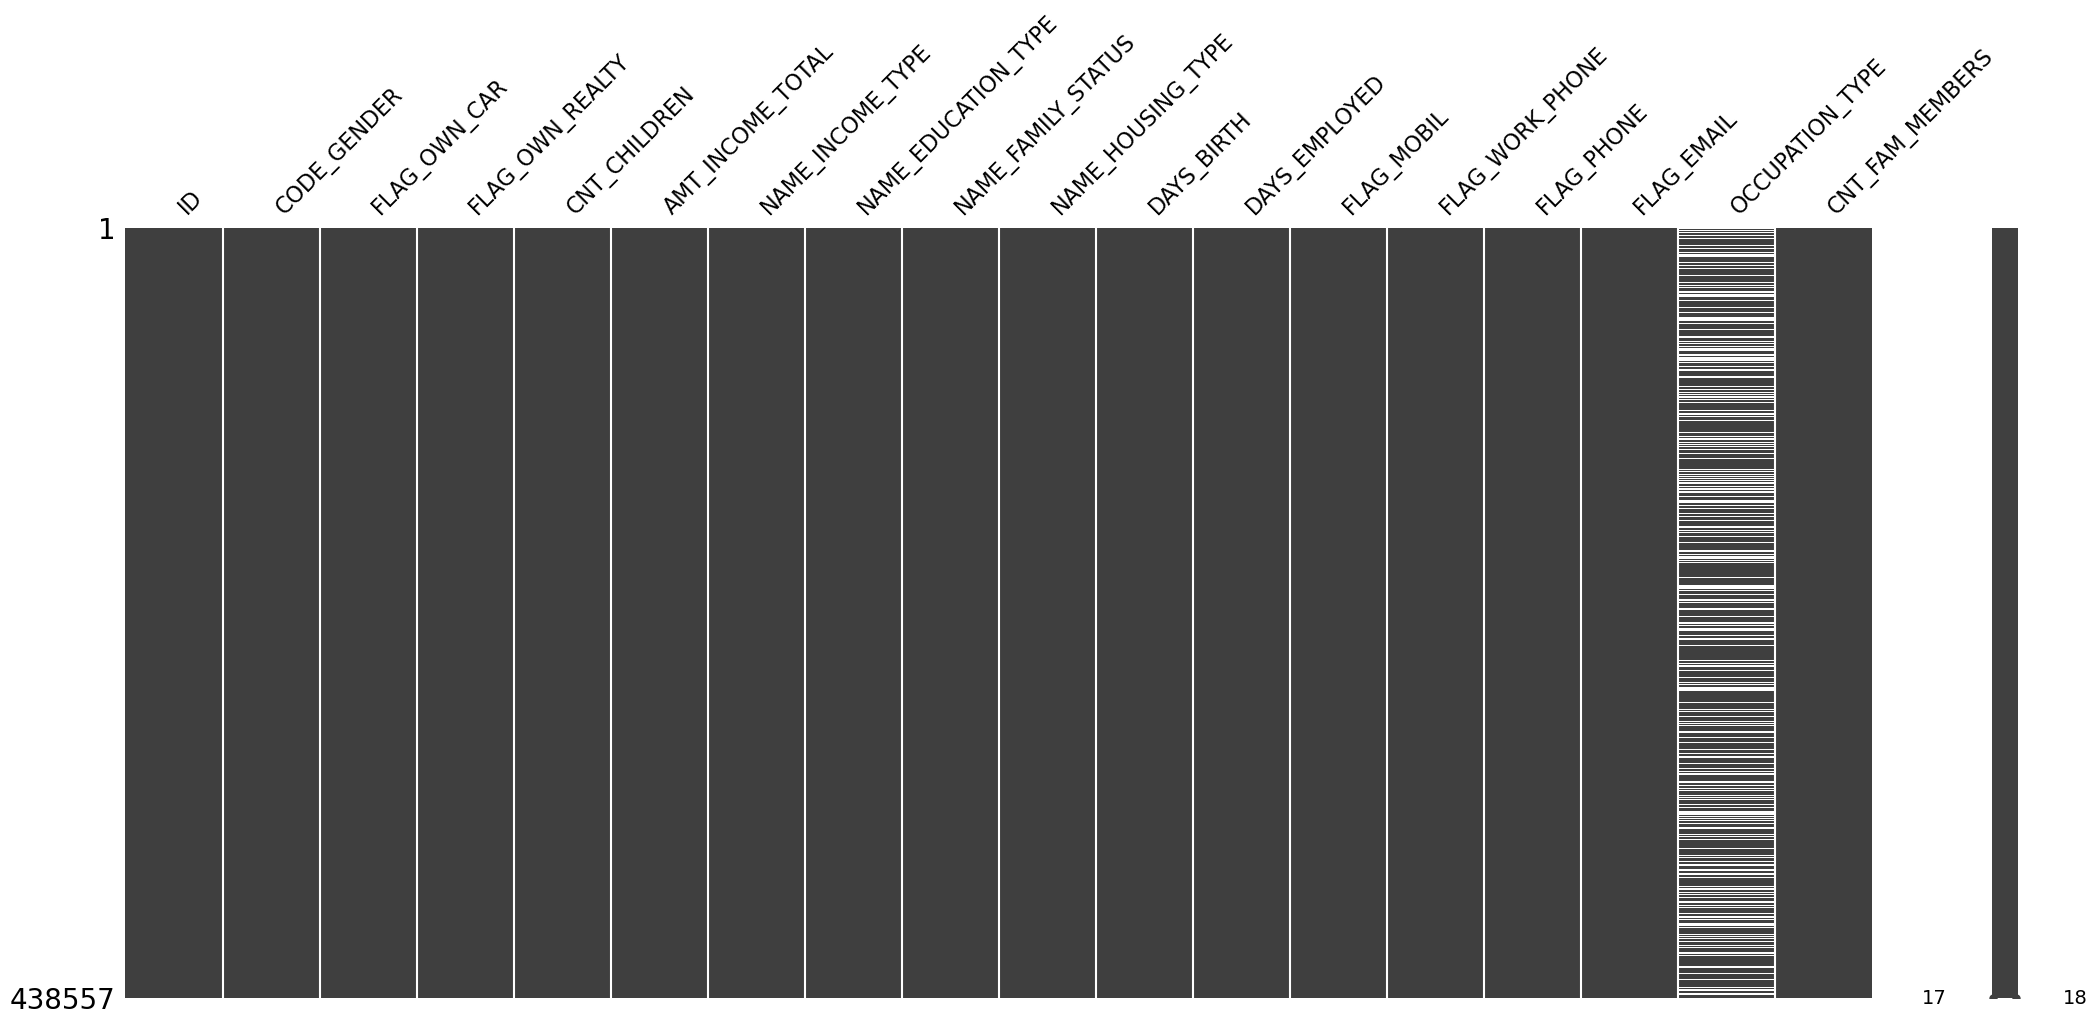

In [9]:
plt_missing_1 = msno.matrix(app_df)
plt.savefig("./Figures/missing_elements.png", dpi = 300, bbox_inches = 'tight')
plt.show()

In [13]:
print("TOTAL NAN in 'OCCUPATION_TYPE': ", len(app_df[app_df['OCCUPATION_TYPE'].isna()].OCCUPATION_TYPE))

TOTAL NAN in 'OCCUPATION_TYPE':  134203


In [14]:
# dropping occupation type which has many null values
app_df.drop('OCCUPATION_TYPE', axis=1, inplace=True)

In [15]:
# Checking duplicates in 'ID' column
len(app_df['ID']) - len(app_df['ID'].unique())

47

In [16]:
# Dropping duplicate entries from ID column
app_df = app_df.drop_duplicates('ID', keep='last')

In [17]:
# Checking Non-Numerical Columns
cat_columns = app_df.columns[(app_df.dtypes =='object').values].tolist()
print("Non-Numerical Columns: ")
cat_columns

Non-Numerical Columns: 


['CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE']

In [18]:
# Checking Numerical Columns
print("Numerical Columns")
app_df.columns[(app_df.dtypes !='object').values].tolist()

Numerical Columns


['ID',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'FLAG_MOBIL',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS']

In [19]:
# Checking unique values from Categorical Columns
for i in app_df.columns[(app_df.dtypes =='object').values].tolist():
    print(i,'\n')
    print(app_df[i].value_counts())
    print('-----------------------------------------------')

CODE_GENDER 

F    294412
M    144098
Name: CODE_GENDER, dtype: int64
-----------------------------------------------
FLAG_OWN_CAR 

N    275428
Y    163082
Name: FLAG_OWN_CAR, dtype: int64
-----------------------------------------------
FLAG_OWN_REALTY 

Y    304043
N    134467
Name: FLAG_OWN_REALTY, dtype: int64
-----------------------------------------------
NAME_INCOME_TYPE 

Working                 226087
Commercial associate    100739
Pensioner                75483
State servant            36184
Student                     17
Name: NAME_INCOME_TYPE, dtype: int64
-----------------------------------------------
NAME_EDUCATION_TYPE 

Secondary / secondary special    301789
Higher education                 117509
Incomplete higher                 14849
Lower secondary                    4051
Academic degree                     312
Name: NAME_EDUCATION_TYPE, dtype: int64
-----------------------------------------------
NAME_FAMILY_STATUS 

Married                 299798
Single / not ma

In [20]:
app_df['CNT_CHILDREN'].value_counts()

0     304038
1      88518
2      39879
3       5430
4        486
       ...  
9          5
12         4
6          4
14         3
19         1
Name: CNT_CHILDREN, Length: 12, dtype: int64

In [21]:
print('Min DAYS_BIRTH :', app_df['DAYS_BIRTH'].min(),'\nMax DAYS_BIRTH :', app_df['DAYS_BIRTH'].max())

Min DAYS_BIRTH : -25201 
Max DAYS_BIRTH : -7489


In [22]:
# Converting 'DAYS_BIRTH' values from Day to Years
app_df['DAYS_BIRTH'] = round(app_df['DAYS_BIRTH']/-365,0)
app_df.rename(columns={'DAYS_BIRTH':'AGE_YEARS'}, inplace=True)

In [23]:
app_df.head(1)

,ID,CODE_GENDER,FLAG_OWN_CAR,...,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
0,5008804,M,Y,...,0,0,2.0


<span style="color:red;"><strong>NEEDS TO BE INCLUDED: how the days_birth has been provided to us, and how should the age of the applicants be framed to be easily used in the KNN.</strong></span>

In [24]:
# Checking unique values greater than 0
app_df[app_df['DAYS_EMPLOYED']>0]['DAYS_EMPLOYED'].unique()

array([365243], dtype=int64)

In [25]:
# As mentioned in document, if 'DAYS_EMPLOYED' is positive no, it means person currently unemployed, hence replacing it with 0
app_df['DAYS_EMPLOYED'].replace(365243, 0, inplace=True)

In [26]:
app_df['DAYS_EMPLOYED']

0        -4542
1        -4542
2        -1134
3        -3051
4        -3051
          ... 
438552       0
438553   -3007
438554    -372
438555       0
438556   -1201
Name: DAYS_EMPLOYED, Length: 438510, dtype: int64

In [27]:
# Converting 'DAYS_EMPLOYED' values from Day to Years
app_df['DAYS_EMPLOYED'] = abs(round(app_df['DAYS_EMPLOYED']/-365,0))
app_df.rename(columns={'DAYS_EMPLOYED':'YEARS_EMPLOYED'}, inplace=True)  

<span style="color:red;"><strong>NEEDS TO BE INCLUDED: about the positive value stating 'Unemployed' status of the applicant. And then converting days to years as below.</strong></span>

In [28]:
app_df['FLAG_MOBIL'].value_counts()
# As all the values in column are 1, hence dropping column
app_df.drop('FLAG_MOBIL', axis=1, inplace=True)

In [29]:
app_df['FLAG_WORK_PHONE'].value_counts()

0    348118
1     90392
Name: FLAG_WORK_PHONE, dtype: int64

In [30]:
# This column only contains 0 & 1 values for Mobile no submitted, hence dropping column
app_df.drop('FLAG_WORK_PHONE', axis=1, inplace=True)

In [31]:
app_df['FLAG_PHONE'].value_counts()

0    312323
1    126187
Name: FLAG_PHONE, dtype: int64

In [32]:
# This column only contains 0 & 1 values for Phone no submitted, hence dropping column
app_df.drop('FLAG_PHONE', axis=1, inplace=True)

In [33]:
app_df['FLAG_EMAIL'].value_counts()

0    391062
1     47448
Name: FLAG_EMAIL, dtype: int64

In [34]:
# This column only contains 0 & 1 values for Email submitted, hence dropping column
app_df.drop('FLAG_EMAIL', axis=1, inplace=True)

<span style = 'color:red;'><strong>Since, all the individuals have mobile phone, so this feature doesn't contribute to the classification. Also, whether the customer submitted their, work phone number, or personal phone number or their email, doesnt signify anything, so these columns or features are removed.</strong></span>

In [35]:
app_df['CNT_FAM_MEMBERS'].value_counts()

2.0     233867
1.0      84483
3.0      77119
4.0      37351
5.0       5081
         ...  
11.0         5
14.0         4
8.0          4
15.0         3
20.0         1
Name: CNT_FAM_MEMBERS, Length: 13, dtype: int64

In [36]:
app_df.head(5)

,ID,CODE_GENDER,FLAG_OWN_CAR,...,AGE_YEARS,YEARS_EMPLOYED,CNT_FAM_MEMBERS
0,5008804,M,Y,...,33.0,12.0,2.0
1,5008805,M,Y,...,33.0,12.0,2.0
2,5008806,M,Y,...,59.0,3.0,2.0
3,5008808,F,N,...,52.0,8.0,1.0
4,5008809,F,N,...,52.0,8.0,1.0


### Visualization (for Numerical Columns)

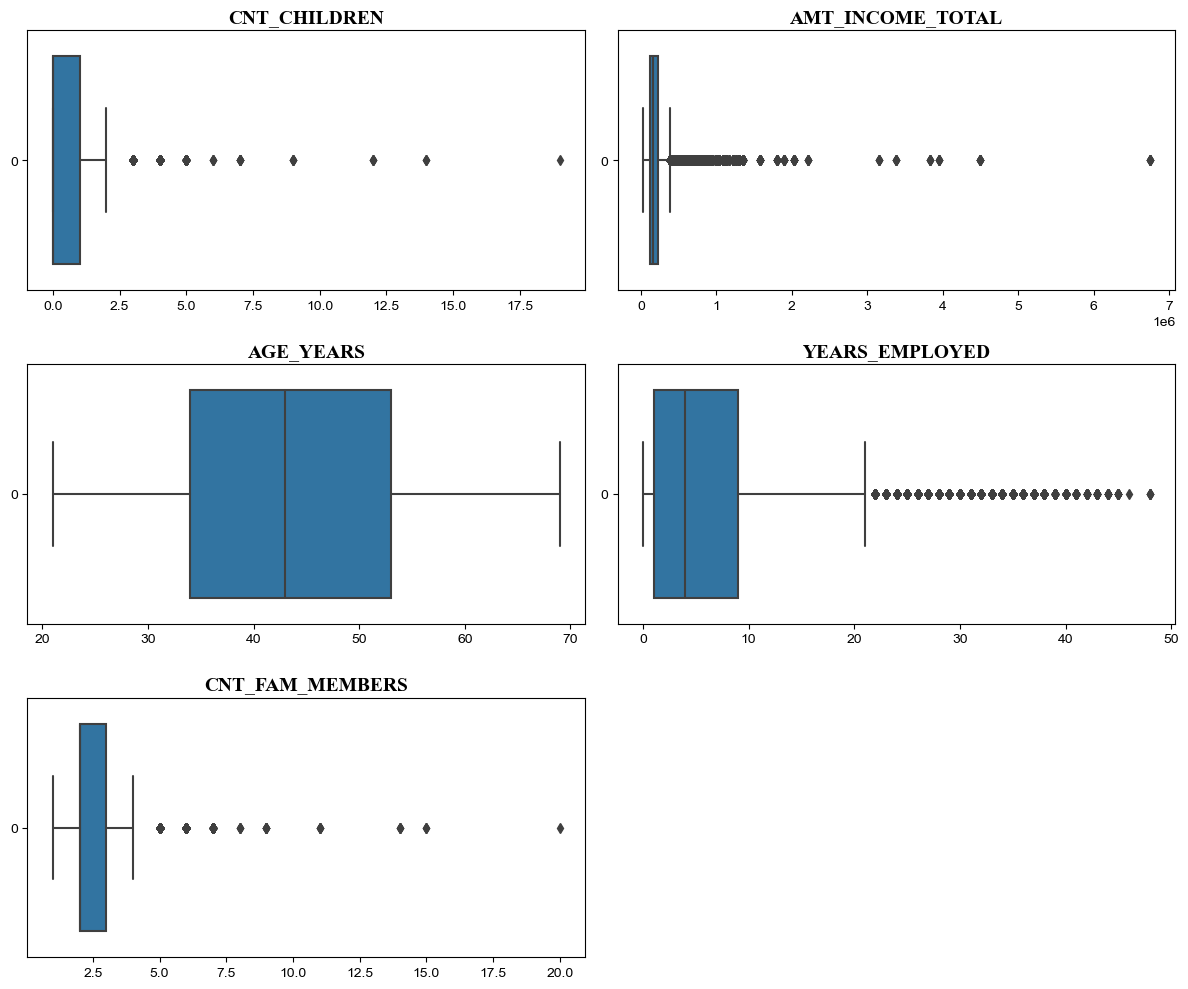

In [50]:
fig, axes = plt.subplots(3, 2, figsize=(12, 10))
font = FontProperties(family='Times New Roman', size = 10)
font_label = FontProperties(family='Times New Roman', size = 14, weight = "bold")
font_xticks = FontProperties(family='Times New Roman', size = 12)
font_yticks = FontProperties(family='Times New Roman', size = 12)
sns.set_style('whitegrid')

sns.boxplot(app_df['CNT_CHILDREN'], orient='h', ax=axes[0][0])
sns.boxplot(app_df['AMT_INCOME_TOTAL'], orient='h', ax=axes[0][1])
sns.boxplot(app_df['AGE_YEARS'], orient='h', ax=axes[1][0])
sns.boxplot(app_df['YEARS_EMPLOYED'], orient='h', ax=axes[1][1])
sns.boxplot(app_df['CNT_FAM_MEMBERS'], orient='h', ax=axes[2][0])

axes[0][0].set_title('CNT_CHILDREN', font = font_label)
axes[0][1].set_title('AMT_INCOME_TOTAL', font = font_label)
axes[1][0].set_title('AGE_YEARS', font = font_label)
axes[1][1].set_title('YEARS_EMPLOYED', font = font_label)
axes[2][0].set_title('CNT_FAM_MEMBERS', font = font_label)

axes[2][1].axis('off')
plt.tight_layout()
plt.savefig("./Figures/2_Outliers_box_plot.png", dpi = 300, bbox_inches = 'tight')
plt.show()

#### Removing Outliers

In [51]:
high_bound = app_df['CNT_CHILDREN'].quantile(0.999)
print('high_bound :', high_bound)
low_bound = app_df['CNT_CHILDREN'].quantile(0.001)
print('low_bound :', low_bound)

high_bound : 4.0
low_bound : 0.0


In [52]:
app_df = app_df[(app_df['CNT_CHILDREN'] >= low_bound) & (app_df['CNT_CHILDREN'] <= high_bound)]

In [53]:
high_bound = app_df['AMT_INCOME_TOTAL'].quantile(0.999)
print('high_bound :', high_bound)
low_bound = app_df['AMT_INCOME_TOTAL'].quantile(0.001)
print('low_bound :', low_bound)

high_bound : 990000.0
low_bound : 36000.0


In [54]:
app_df = app_df[(app_df['AMT_INCOME_TOTAL'] >= low_bound) & (app_df['AMT_INCOME_TOTAL'] <= high_bound)]

In [55]:
high_bound = app_df['YEARS_EMPLOYED'].quantile(0.999)
print('high_bound :', high_bound)
low_bound = app_df['YEARS_EMPLOYED'].quantile(0.001)
print('low_bound :', low_bound)

high_bound : 40.0
low_bound : 0.0


In [56]:
app_df = app_df[(app_df['YEARS_EMPLOYED']>=low_bound) & (app_df['YEARS_EMPLOYED']<=high_bound)]

In [57]:
high_bound = app_df['CNT_FAM_MEMBERS'].quantile(0.999)
print('high_bound :', high_bound)
low_bound = app_df['CNT_FAM_MEMBERS'].quantile(0.001)
print('low_bound :', low_bound)

high_bound : 6.0
low_bound : 1.0


In [58]:
app_df = app_df[(app_df['CNT_FAM_MEMBERS']>=low_bound) & (app_df['CNT_FAM_MEMBERS']<=high_bound)]

In [59]:
app_df.head(5)

,ID,CODE_GENDER,FLAG_OWN_CAR,...,AGE_YEARS,YEARS_EMPLOYED,CNT_FAM_MEMBERS
0,5008804,M,Y,...,33.0,12.0,2.0
1,5008805,M,Y,...,33.0,12.0,2.0
2,5008806,M,Y,...,59.0,3.0,2.0
3,5008808,F,N,...,52.0,8.0,1.0
4,5008809,F,N,...,52.0,8.0,1.0


<span style = "color:red"><strong>In all the numerical features, the outliers were removed, using box plot, with lower bound and high bound defined by their respective Interquartile ranges</strong></span>

#### Credit Record

In [60]:
credit_df.head(5)

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [61]:
credit_df.isnull().sum()

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

In [62]:
credit_df['STATUS'].value_counts()

C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: STATUS, dtype: int64

In [63]:
# categorizing 'STATUS' column to binary classification   0 : Good Client and 1 : bad client
credit_df['STATUS'].replace(['C', 'X'], 0, inplace=True)
credit_df['STATUS'].replace(['2','3','4','5'], 1, inplace=True)
credit_df['STATUS'] = credit_df['STATUS'].astype('int')

<span style = "color:blue;">Analysis: Since the 'STATUS' has multi-classes, with varying meaning, so this needs to be mapped into a sensible binary classification, so the client who have paid in the same month, i.e. C and those who didn't take any loan, i.e. X should be called as 'Good Client' morally, and those who delay from 2-5 STATUS class is taken as bad client, and the class '0' which is a month delayed is also said to be Good Client, whereas '1', which is more than a month delayed is entitled as 'Bad Client'.

In [64]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype
---  ------          --------------    -----
 0   ID              1048575 non-null  int64
 1   MONTHS_BALANCE  1048575 non-null  int64
 2   STATUS          1048575 non-null  int32
dtypes: int32(1), int64(2)
memory usage: 20.0 MB


In [425]:
credit_df['STATUS'].value_counts(normalize = True) * 100

0    98.646353
1     1.353647
Name: STATUS, dtype: float64

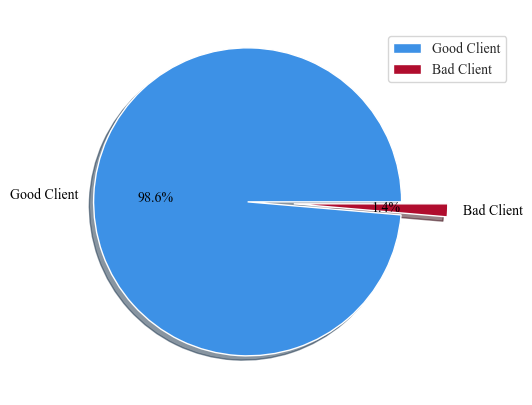

In [84]:
# Get the value counts as percentages
percentage_counts = credit_df['STATUS'].value_counts(normalize=True) * 100

# Create labels for the pie chart
labels = ['Good Client', 'Bad Client']

# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(percentage_counts, explode = (0.1, 0.2), labels=labels, autopct='%1.1f%%', shadow=True, colors=[(0.24, 0.57, 0.90), (0.69, 0.05, 0.18)], textprops = {'family':'Times New Roman', 'size': 10, 'color':'black'})
plt.legend(loc = 'best', bbox_to_anchor = (1.15, 0.95), prop = font)
plt.savefig('./Figures/3_Target_distribution_piechart.png', dpi = 300, bbox_inches = 'tight')
plt.show()

In [86]:
credit_df_trans = credit_df.groupby('ID').agg(max).reset_index()
credit_df_trans.drop('MONTHS_BALANCE', axis=1, inplace=True)
credit_df_trans.head()

,ID,STATUS
0,5001711,0
1,5001712,0
2,5001713,0
3,5001714,0
4,5001715,0


In [87]:
credit_df_trans['STATUS'].value_counts(normalize=True)*100

0    88.365771
1    11.634229
Name: STATUS, dtype: float64

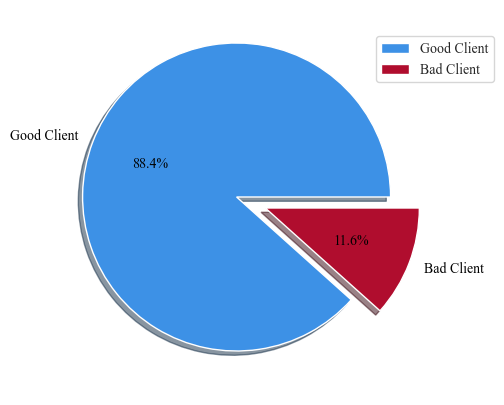

In [90]:
# Get the value counts as percentages
percentage_counts = credit_df_trans['STATUS'].value_counts(normalize=True) * 100

# Create labels for the pie chart
labels = ['Good Client', 'Bad Client']

# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(percentage_counts, explode = (0.1, 0.1), labels=labels, autopct='%1.1f%%', shadow=True, colors=[(0.24, 0.57, 0.90), (0.69, 0.05, 0.18)], textprops = {'family':'Times New Roman', 'size': 10, 'color':'black'})
plt.legend(loc = 'best', bbox_to_anchor = (1.15, 0.95), prop = font)
plt.savefig('./Figures/4_TD_agg_piechart.png', dpi = 300, bbox_inches = 'tight')
plt.show()

<b>Analysis: Since, the credit record has multiple history of a single user, so all the credit score history are grouped under user "IDs", and then their maximum behavior i.e of either being a good or bad client was taken, so form as single column for each client.<b>

### Merging Dataframes

In [91]:
# merging the two datasets based on 'ID'
final_df = pd.merge(app_df, credit_df_trans, on='ID', how='inner')
final_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,...,YEARS_EMPLOYED,CNT_FAM_MEMBERS,STATUS
0,5008804,M,Y,...,12.0,2.0,1
1,5008805,M,Y,...,12.0,2.0,1
2,5008806,M,Y,...,3.0,2.0,0
3,5008808,F,N,...,8.0,1.0,0
4,5008809,F,N,...,8.0,1.0,0


<b>Since, the application record data and credit score data, are separate records, which needs to be combined under their common IDs of user using inner joining.

In [92]:
final_df.shape

(36326, 14)

In [93]:
# dropping 'ID' column as it is having only unique values (not required for ML Model)
final_df.drop('ID', axis=1, inplace=True)

In [94]:
# checking if there are still duplicate rows in Final Dataframe
len(final_df) - len(final_df.drop_duplicates())

25268

In [95]:
# Dropping duplicate records
final_df = final_df.drop_duplicates()
final_df.reset_index(drop=True ,inplace=True)

In [96]:
final_df.shape

(11058, 13)

In [97]:
final_df.isnull().sum()

CODE_GENDER          0
FLAG_OWN_CAR         0
FLAG_OWN_REALTY      0
CNT_CHILDREN         0
AMT_INCOME_TOTAL     0
                    ..
NAME_HOUSING_TYPE    0
AGE_YEARS            0
YEARS_EMPLOYED       0
CNT_FAM_MEMBERS      0
STATUS               0
Length: 13, dtype: int64

In [98]:
final_df['STATUS'].value_counts(normalize = True)*100

0    78.513294
1    21.486706
Name: STATUS, dtype: float64

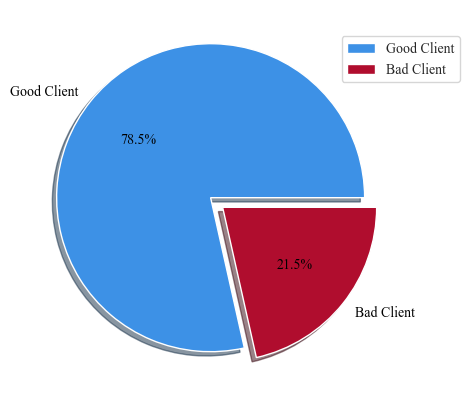

In [100]:
percentage_counts = final_df['STATUS'].value_counts(normalize = True)*100

labels = ['Good Client', 'Bad Client']

plt.figure(figsize=(5, 5))
plt.pie(percentage_counts, explode = (0.05, 0.05), labels=labels, autopct='%1.1f%%', shadow=True, colors=[(0.24, 0.57, 0.90), (0.69, 0.05, 0.18)], textprops = {'family':'Times New Roman', 'size': 10, 'color':'black'})
plt.legend(loc = 'best', bbox_to_anchor = (1.15, 0.95), prop = font)
plt.savefig('./Figures/5_FINAL_TARGET_piechart.png', dpi = 300, bbox_inches = 'tight')
plt.show()

After all the data cleaning, preprocessing and merging process, the total dataset size as combined reduce to 11058 with 12 features and 1 column for class, also the 'good' client and 'bad' client was in the ratio of 78% to 21%. 

### Visualization

In [101]:
final_df.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,...,YEARS_EMPLOYED,CNT_FAM_MEMBERS,STATUS
0,M,Y,Y,...,12.0,2.0,1
1,M,Y,Y,...,3.0,2.0,0
2,F,N,Y,...,8.0,1.0,0
3,F,N,Y,...,0.0,1.0,0
4,M,Y,Y,...,2.0,2.0,0


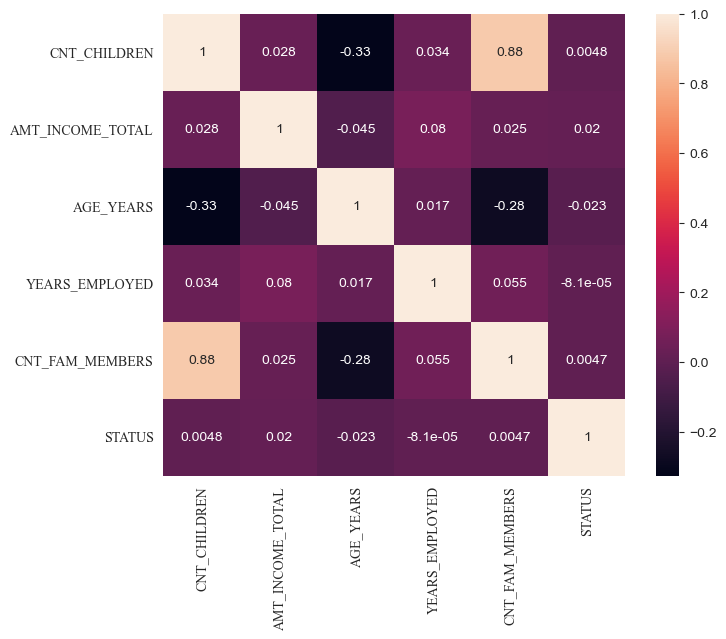

In [106]:
plt.figure(figsize = (8, 6))
font = FontProperties(family='Times New Roman', size = 10)
font_label = FontProperties(family='Times New Roman', size = 14, weight = "bold")
font_xticks = FontProperties(family='Times New Roman', size = 10)
font_yticks = FontProperties(family='Times New Roman', size = 10)
sns.heatmap(final_df.corr(), annot=True, square = True)
plt.xticks(font = font_xticks)
plt.yticks(font = font_yticks)
plt.savefig("./Figures/6_Correlation_heat_map.png", dpi = 300, bbox_inches = 'tight')
plt.show()

<b> This graph shows that, there is no column (Feature) which is highly co-related with 'Status'

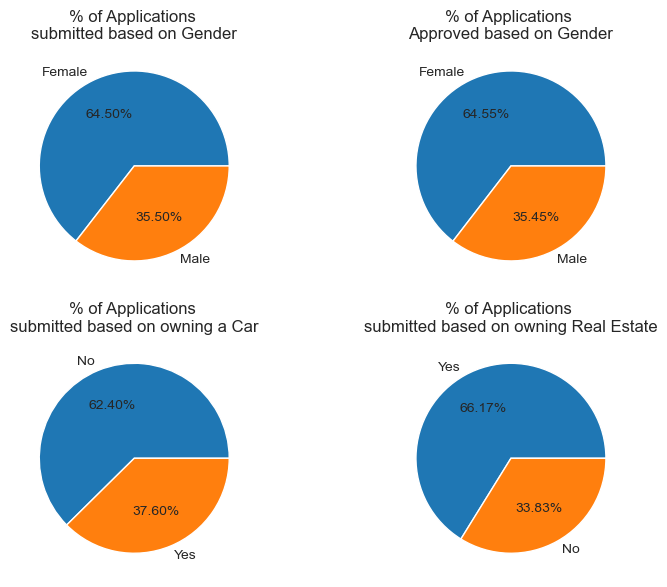

In [438]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

# Plot the first pie chart in the upper-left subplot
axes[0, 0].pie(final_df['CODE_GENDER'].value_counts(), labels=['Female', 'Male'], autopct='%1.2f%%')
axes[0, 0].set_title('% of Applications \nsubmitted based on Gender')

# Plot the second pie chart in the upper-right subplot
axes[0, 1].pie(final_df[final_df['STATUS'] == 0]['CODE_GENDER'].value_counts(), labels=['Female', 'Male'], autopct='%1.2f%%')
axes[0, 1].set_title('% of Applications \nApproved based on Gender')

# Plot the third pie chart in the lower-left subplot
axes[1, 0].pie(final_df['FLAG_OWN_CAR'].value_counts(), labels=['No', 'Yes'], autopct='%1.2f%%')
axes[1, 0].set_title('% of Applications \nsubmitted based on owning a Car')

# Plot the fourth pie chart in the lower-right subplot
axes[1, 1].pie(final_df['FLAG_OWN_REALTY'].value_counts(), labels=['Yes', 'No'], autopct='%1.2f%%')
axes[1, 1].set_title('% of Applications \nsubmitted based on owning Real Estate')
plt.subplots_adjust(wspace = 0.4, hspace = 10)

# Add borders between subplots
for ax in axes.flatten():
    ax.spines['top'].set_visible(True)
    ax.spines['right'].set_visible(True)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [121]:
font = FontProperties(family='Times New Roman', size = 10)
font_label = FontProperties(family='Times New Roman', size = 12, weight = "bold")
font_xticks = FontProperties(family='Times New Roman', size = 12)
font_yticks = FontProperties(family='Times New Roman', size = 12)

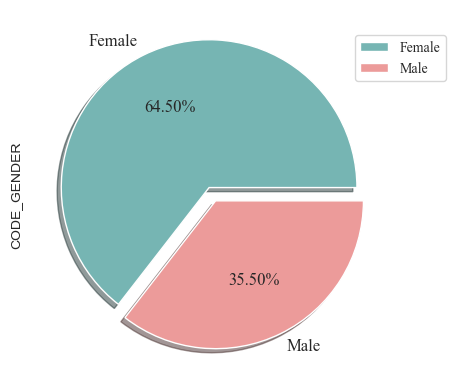

In [142]:
# Plot the first pie chart (Gender)
g1 = final_df['CODE_GENDER'].value_counts().plot.pie(explode=[0.05, 0.05], labels=['Female', 'Male'], autopct='%1.2f%%', shadow=True, colors=["#76B5B3", "#EC9B9A"], textprops={'fontsize': 12, 'family':"Times New Roman"})
# g1.set_title("Percentage of Applications \nSubmitted based on Gender", font = font_label)
plt.legend(loc = 'best', prop = font, bbox_to_anchor = (1.15, 0.95))
plt.savefig("./Figures/7_submission_gender.png", dpi = 300, bbox_inches = 'tight')
plt.show()

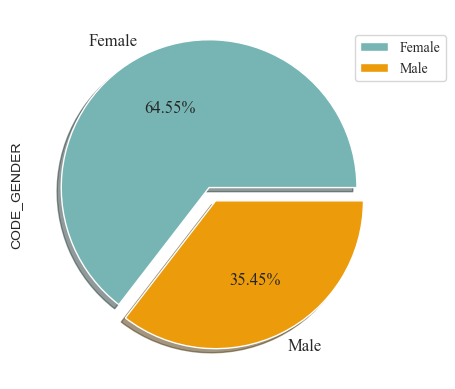

In [143]:
# Plot the first pie chart (Gender)
g2 = final_df[final_df['STATUS'] == 0]['CODE_GENDER'].value_counts().plot.pie(explode=[0.05, 0.05], labels=['Female', 'Male'], autopct='%1.2f%%', shadow=True, colors=["#76B5B3", "#EC9B0B"], textprops={'fontsize': 12, 'family': 'Times New Roman'})
# g2.set_title("Percentage of Applications \nApproved based on Gender", font = font_label)
plt.legend(loc = 'best', prop = font, bbox_to_anchor = (1.15, 0.95))
plt.savefig("./Figures/8_approved_gender.png", dpi = 300, bbox_inches = 'tight')
plt.show()

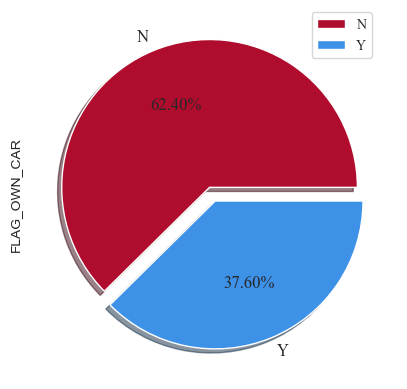

In [144]:
# Plot the second pie chart (Car Ownership)
g3 = final_df['FLAG_OWN_CAR'].value_counts().plot.pie(explode=[0.05, 0.05], autopct='%1.2f%%', shadow=True, colors=[(0.69, 0.05, 0.18), (0.24, 0.57, 0.90)], textprops={'fontsize': 12, 'family': 'Times New Roman'})

# g3.set_title("Percentage of Applications \nSubmitted based on owning a Car", font = font_label)
plt.legend(loc = 'best', prop = font, bbox_to_anchor = (0.75, 0.85))
plt.savefig("./Figures/8_owning_car.png", dpi = 300, bbox_inches = 'tight')
plt.show()

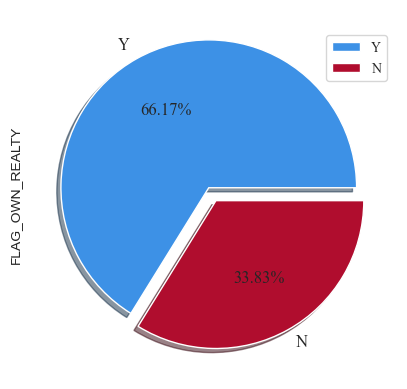

In [145]:
# Plot the third pie chart (Realty Ownership)
g4 = final_df['FLAG_OWN_REALTY'].value_counts().plot.pie(explode=[0.05, 0.05], autopct='%1.2f%%', shadow=True, colors=[(0.24, 0.57, 0.90), (0.69, 0.05, 0.18)], textprops={'fontsize': 12, 'family': 'Times New Roman'})
# g4.set_title("Percentage of Applications \nSubmitted based on owning Real Estate")
plt.legend(loc = 'best', prop = font, bbox_to_anchor = (0.99, 0.95))
plt.savefig("./Figures/9_real_estate.png", dpi = 300, bbox_inches = 'tight')
plt.show()

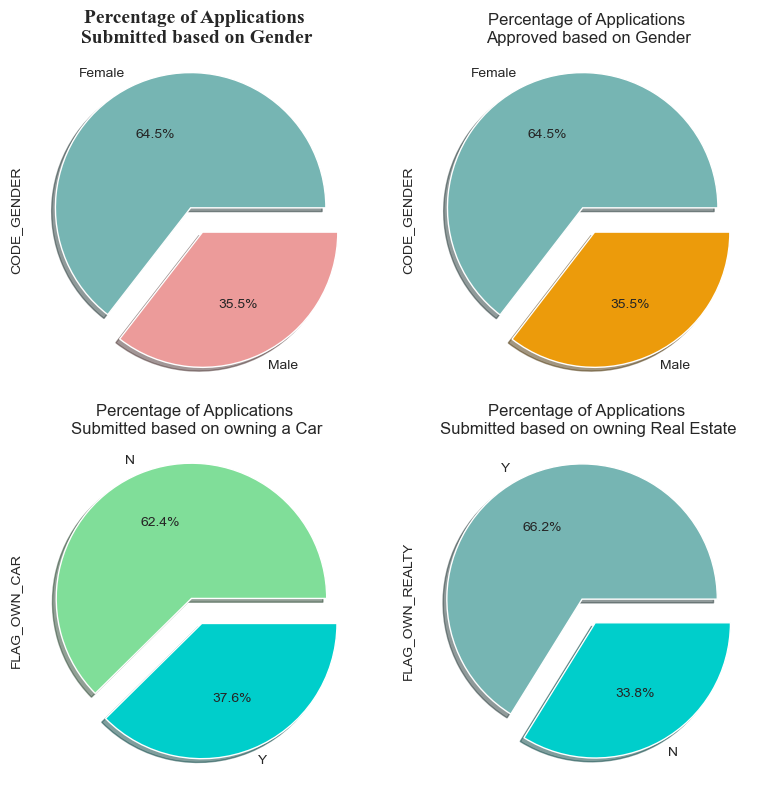

In [108]:
# Create a 1x3 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(8, 8))


# Plot the first pie chart (Gender)
g1 = final_df['CODE_GENDER'].value_counts().plot.pie(explode=[0.1, 0.1], labels=['Female', 'Male'], autopct='%1.1f%%', shadow=True, colors=["#76B5B3", "#EC9B9A"], textprops={'fontsize': 10}, ax=axes[0][0])
g1.set_title("Percentage of Applications \nSubmitted based on Gender", font = font_label)


# Plot the first pie chart (Gender)
g2 = final_df[final_df['STATUS'] == 0]['CODE_GENDER'].value_counts().plot.pie(explode=[0.1, 0.1], labels=['Female', 'Male'], autopct='%1.1f%%', shadow=True, colors=["#76B5B3", "#EC9B0B"], textprops={'fontsize': 10}, ax=axes[0][1])
g2.set_title("Percentage of Applications \nApproved based on Gender", font = font_label)

# Plot the second pie chart (Car Ownership)
g3 = final_df['FLAG_OWN_CAR'].value_counts().plot.pie(explode=[0.1, 0.1], autopct='%1.1f%%', shadow=True, colors=["#80DE99", "#00CECB"], textprops={'fontsize': 10}, ax=axes[1][0])
g3.set_title("Percentage of Applications \nSubmitted based on owning a Car", font = font_label)

# Plot the third pie chart (Realty Ownership)
g4 = final_df['FLAG_OWN_REALTY'].value_counts().plot.pie(explode=[0.1, 0.1], autopct='%1.1f%%', shadow=True, colors=["#76B5B3", "#00CECB"], textprops={'fontsize': 10}, ax=axes[1][1])
g4.set_title("Percentage of Applications \nSubmitted based on owning Real Estate")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


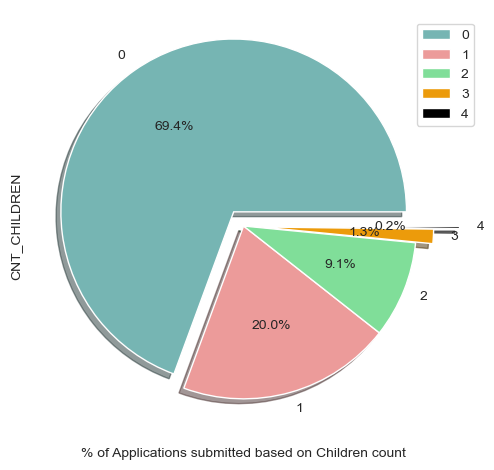

In [146]:
# Plot the first pie chart (Gender)
g1 = final_df['CNT_CHILDREN'].value_counts().plot.pie(explode = [0.1, 0, 0, 0.1, 0.25], labels=final_df['CNT_CHILDREN'].value_counts().index, autopct='%1.1f%%', shadow=True, colors=["#76B5B3", "#EC9B9A", "#80DE99", "#EC9B0B", "#000000"], textprops={'fontsize': 10})
g1.set_xlabel("% of Applications submitted based on Children count")
# Adjust layout
plt.tight_layout()
plt.legend(loc = 'right', bbox_to_anchor = (1.05, 0.85))
# Show the plot
plt.show()

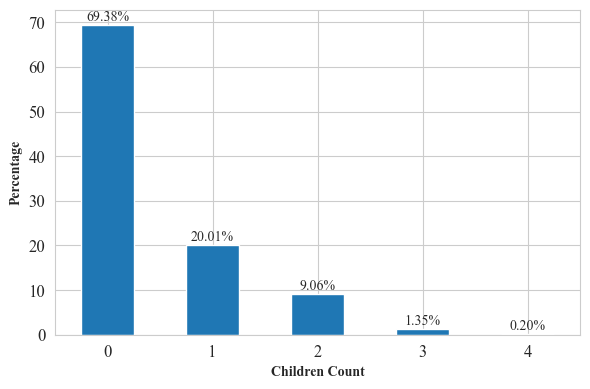

In [168]:
font = FontProperties(family='Times New Roman', size = 10)
font_label = FontProperties(family='Times New Roman', size = 10, weight = "bold")
font_xticks = FontProperties(family='Times New Roman', size = 12)
font_yticks = FontProperties(family='Times New Roman', size = 12)

# Calculate the percentage distribution of 'CNT_CHILDREN'
percentage_distribution = final_df['CNT_CHILDREN'].value_counts(normalize=True) * 100

# Create a bar plot
plt.figure(figsize=(6, 4))
percentage_distribution.plot(kind='bar')

# Add labels and percentages on top of the bars
for x, y in enumerate(percentage_distribution):
    plt.text(x, y + 1, f'{y:.2f}%', ha='center', fontsize = 10, fontfamily = 'Times New Roman')

# Set labels and title
plt.xlabel('Children Count', font = font_label)
plt.ylabel('Percentage', font = font_label)

# Show the plot
plt.xticks(rotation=0, font = font_xticks)
plt.yticks(font = font_yticks)
plt.tight_layout()
plt.savefig('./Figures/10_children_count_bar_plot.png', dpi = 300, bbox_inches = 'tight')
plt.show()

Analysis: This could infer indirectly to the general sense that most parents are well-settled before they could have a baby, in the context of this modern world, so those who have been married but not yet well-settle to have a baby are more likely to apply for the credit cards.

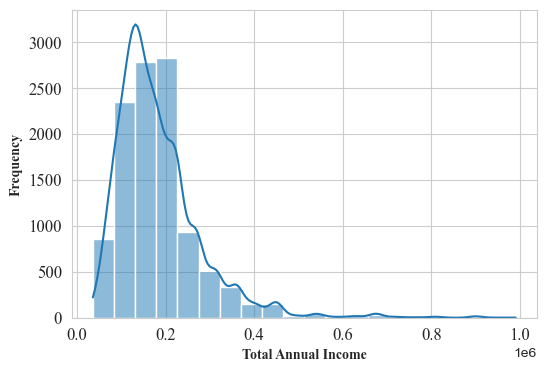

In [170]:
# This graph shows that, majority of applicatant's income lies between 1 to 3 lakh
font = FontProperties(family='Times New Roman', size = 10)
font_label = FontProperties(family='Times New Roman', size = 10, weight = "bold")
font_xticks = FontProperties(family='Times New Roman', size = 12)
font_yticks = FontProperties(family='Times New Roman', size = 12)
plt.figure(figsize=(6, 4))
sns.histplot(final_df['AMT_INCOME_TOTAL'], bins=20, kde=True)
plt.xlabel('Total Annual Income', font = font_label)
plt.ylabel('Frequency', font = font_label)
plt.xticks(font = font_xticks)
plt.yticks(font = font_yticks)
plt.savefig("./Figures/11_total_annual_income_dist.png", dpi = 300, bbox_inches = 'tight')
plt.show()

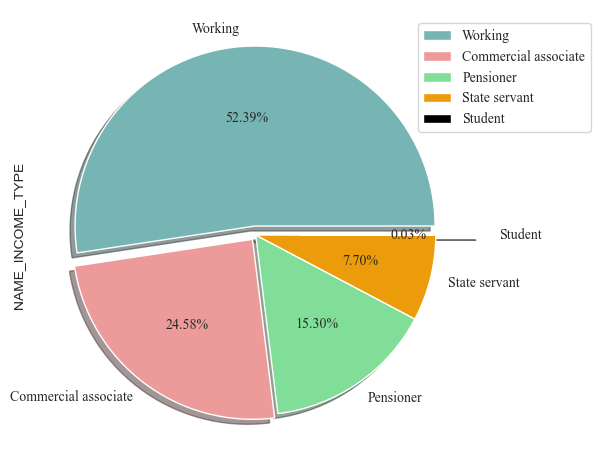

In [181]:
# Plot the first pie chart (Gender)
g1 = final_df['NAME_INCOME_TYPE'].value_counts().plot.pie(explode = (0.05, 0.03, 0, 0, 0.25), labels=final_df['NAME_INCOME_TYPE'].value_counts().index, autopct='%1.2f%%', shadow=True, colors=["#76B5B3", "#EC9B9A", "#80DE99", "#EC9B0B", "#000000"], textprops={'fontsize': 10, 'family': 'Times New Roman'})
# g1.set_xlabel("% of Applications submitted based on Income Type")
# Adjust layout
plt.tight_layout()
plt.legend(loc = 'right', bbox_to_anchor = (1.26, 0.85), prop = font)
plt.savefig('./Figures/12_income_types.png', dpi = 300, bbox_inches = 'tight')
plt.show()

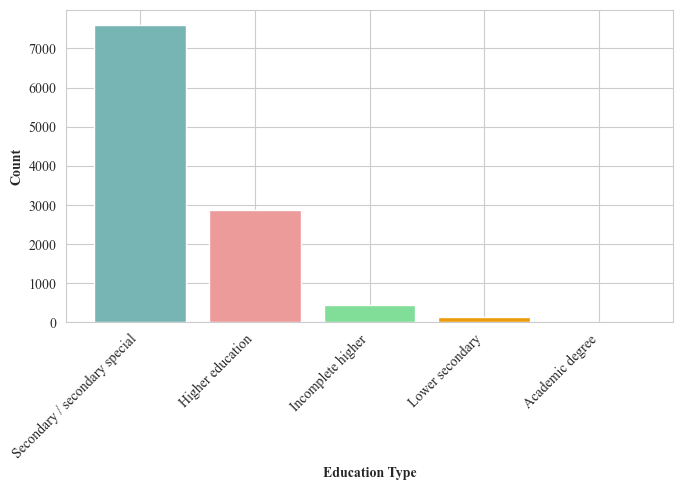

In [196]:
font = FontProperties(family='Times New Roman', size = 10)
font_label = FontProperties(family='Times New Roman', size = 10, weight = "bold")
font_xticks = FontProperties(family='Times New Roman', size = 10)
font_yticks = FontProperties(family='Times New Roman', size = 10)

# Calculate the counts of each education type
education_counts = final_df['NAME_EDUCATION_TYPE'].value_counts()

# Create a bar graph
plt.figure(figsize=(7, 5))  # Adjust the figure size as needed
plt.bar(education_counts.index, education_counts.values, color=["#76B5B3", "#EC9B9A", "#80DE99", "#EC9B0B", "#000000"])

# Add labels and title
plt.xlabel("Education Type", font = font_label)
plt.ylabel("Count", font = font_label)

# Rotate x-axis labels if needed for better readability
plt.xticks(rotation = 45, ha='right', font = font_xticks)
plt.yticks(font = font_yticks)

# Show the plot
plt.tight_layout()
plt.savefig('./Figures/13_education_types.png', dpi = 300, bbox_inches = 'tight')
plt.show()

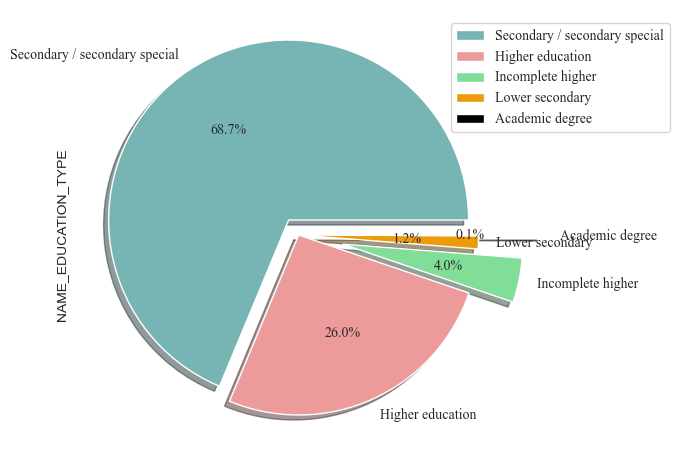

In [185]:
# Plot the first pie chart (Gender)
g1 = final_df['NAME_EDUCATION_TYPE'].value_counts().plot.pie(explode = (0.1, 0, 0.25, 0, 0.35), labels = final_df['NAME_EDUCATION_TYPE'].value_counts().index, autopct='%1.1f%%', shadow=True, colors=["#76B5B3", "#EC9B9A", "#80DE99", "#EC9B0B", "#000000"], textprops={'fontsize': 10, 'family': 'Times New Roman'})
# g1.set_xlabel("% of Applications submitted based on Education")
# Adjust layout
plt.tight_layout()
plt.legend(loc = 'right', bbox_to_anchor = (1.34, 0.85), prop = font)
# Show the plot
plt.show()

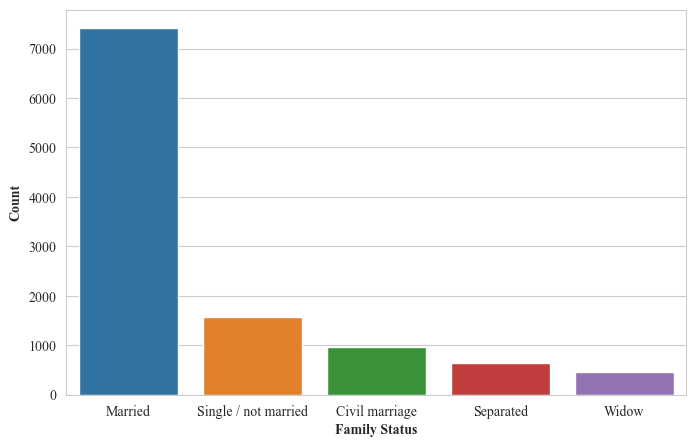

In [198]:
# This graph shows that, majority of applicatant's are married
# Sample data
family_status_counts = final_df['NAME_FAMILY_STATUS'].value_counts()

sns.set_style('whitegrid')

# Create a barplot using Seaborn
plt.figure(figsize=(8, 5))
sns.barplot(x=family_status_counts.index, y=family_status_counts.values)
plt.xticks(rotation = 0)  # Rotate x-axis labels for better visibility if needed
plt.xlabel('Family Status', font = font_label)
plt.ylabel('Count', font = font_label)
# plt.title('Applications submitted based on Family Status')
plt.xticks(font = font_xticks)
plt.yticks(font = font_yticks)
plt.savefig('./Figures/14_family_status.png', dpi = 300, bbox_inches = 'tight')
plt.show()

Which, is also due to the fact, that the expense increases after getting married, so the maximum of applicants should be married. 

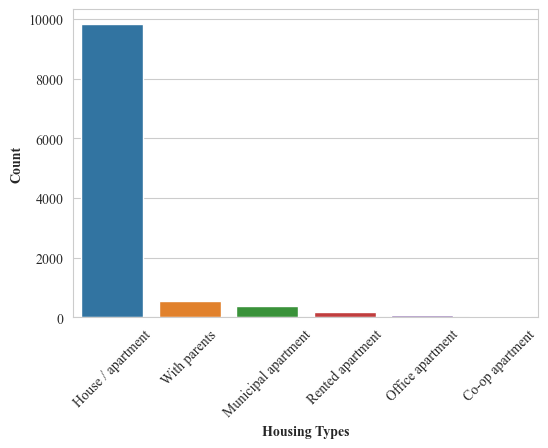

In [199]:
# This graph shows that, majority of applicatant's lives in House / Apartment
family_status_counts = final_df['NAME_HOUSING_TYPE'].value_counts()

# Create a barplot using Seaborn
plt.figure(figsize=(6, 4))
sns.barplot(x=family_status_counts.index, y=family_status_counts.values)
plt.xticks(rotation = 45)  # Rotate x-axis labels for better visibility if needed
plt.xlabel('Housing Types', font = font_label)
plt.ylabel('Count', font = font_label)
plt.xticks(font = font_xticks)
plt.yticks(font = font_yticks)
plt.savefig('./Figures/15_housing_types.png', dpi = 300, bbox_inches = 'tight')
plt.show()

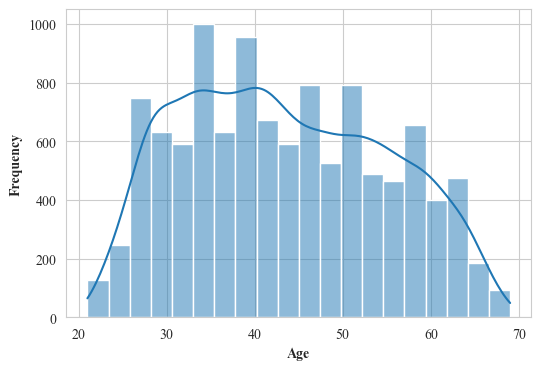

In [201]:
plt.figure(figsize=(6, 4))
sns.histplot(final_df['AGE_YEARS'], bins=20, kde=True)
plt.xlabel('Age', font = font_label)
plt.ylabel("Frequency", font = font_label)
plt.xticks(font = font_xticks)
plt.yticks(font = font_yticks)
plt.savefig('./Figures/15_age_distribution.png', dpi = 300, bbox_inches = 'tight')
plt.show()

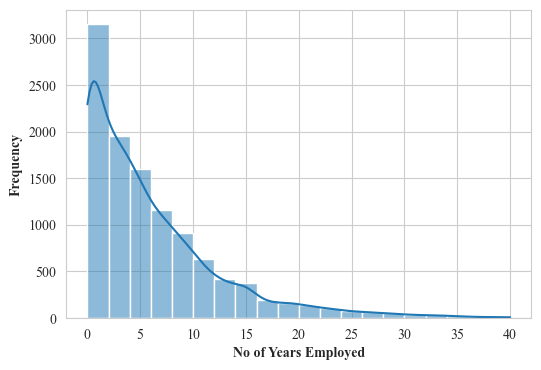

In [202]:
# This graph shows that, majority of applicatant's are Employed for 0 to 7 years
plt.figure(figsize=(6, 4))
sns.histplot(final_df['YEARS_EMPLOYED'], bins=20, kde=True)
plt.xlabel('No of Years Employed', font = font_label)
plt.ylabel("Frequency", font = font_label)
plt.xticks(font = font_xticks)
plt.yticks(font = font_yticks)
plt.savefig('./Figures/16_years_employed.png', dpi = 300, bbox_inches = 'tight')
plt.show()

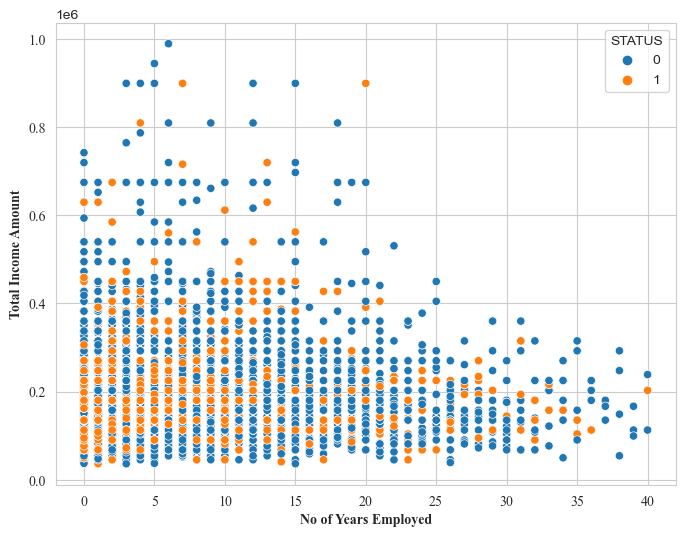

In [203]:
# This graph shows that, majority of applications are rejected if Total income & years of Employment is less
plt.figure(figsize=(8, 6))
sns.scatterplot(data=final_df, x='YEARS_EMPLOYED', y='AMT_INCOME_TOTAL', hue='STATUS')
plt.xlabel('No of Years Employed', font = font_label)
plt.ylabel("Total Income Amount", font = font_label)
plt.xticks(font = font_xticks)
plt.yticks(font = font_yticks)
plt.savefig('./Figures/17_scatter_plot_employed_vs_income.png', dpi = 300, bbox_inches = 'tight')
plt.show()

### Feature Selection

In [204]:
# Taking only the categorical Columns
cat_columns = final_df.columns[(final_df.dtypes =='object').values].tolist()
cat_columns

['CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE']

In [205]:
#Converting all Non-Numerical Columns to Numerical
from sklearn.preprocessing import LabelEncoder

for col in cat_columns:
    globals()['LE_{}'.format(col)] = LabelEncoder()
    final_df[col] = globals()['LE_{}'.format(col)].fit_transform(final_df[col])
final_df.head() 

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,...,YEARS_EMPLOYED,CNT_FAM_MEMBERS,STATUS
0,1,1,1,...,12.0,2.0,1
1,1,1,1,...,3.0,2.0,0
2,0,0,1,...,8.0,1.0,0
3,0,0,1,...,0.0,1.0,0
4,1,1,1,...,2.0,2.0,0


In [206]:
for col in cat_columns:
    print(col , "  : ", globals()['LE_{}'.format(col)].classes_)

CODE_GENDER   :  ['F' 'M']
FLAG_OWN_CAR   :  ['N' 'Y']
FLAG_OWN_REALTY   :  ['N' 'Y']
NAME_INCOME_TYPE   :  ['Commercial associate' 'Pensioner' 'State servant' 'Student' 'Working']
NAME_EDUCATION_TYPE   :  ['Academic degree' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Secondary / secondary special']
NAME_FAMILY_STATUS   :  ['Civil marriage' 'Married' 'Separated' 'Single / not married' 'Widow']
NAME_HOUSING_TYPE   :  ['Co-op apartment' 'House / apartment' 'Municipal apartment'
 'Office apartment' 'Rented apartment' 'With parents']


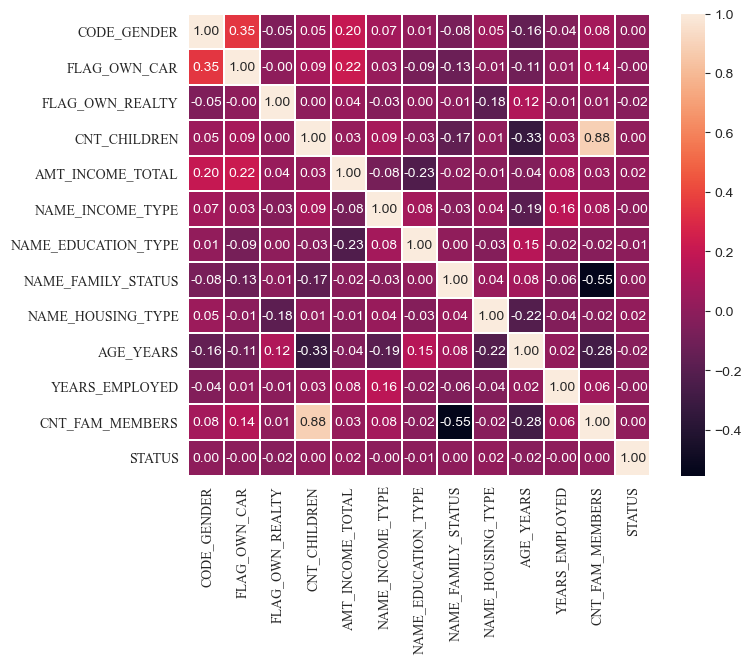

In [211]:
correlation_matrix = final_df.corr()

plt.figure(figsize=(8, 6))
plt.xticks(font = font_xticks)
plt.yticks(font = font_yticks)
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths = 0.01, square = True)
plt.savefig("./Figures/18_Correlation_all_heat_map.png", dpi = 300, bbox_inches = 'tight')
plt.show()

### Machine Learning Models

In [253]:
def build_classification_rep(y_pred, y_true):
    classification_rep = classification_report(y_true = y_true, y_pred = y_pred, output_dict=True)
    data = []
    accuracy_value = None
    for key, value in classification_rep.items():
        if key == 'accuracy':
            accuracy_value = "{:.2f}".format(value * 100)
        if not isinstance(value, float):
            row = [key] + [value[label] for label in value.keys()]
            data.append(row)

    columns = ['class', 'precision', 'recall', 'f1-score', 'support']
    df = pd.DataFrame(data, columns=columns)
    df['precision'] = df['precision'].apply(lambda x: "{:.2f}".format(x * 100))
    df['recall'] = df['recall'].apply(lambda x: "{:.2f}".format(x * 100))
    df['f1-score'] = df['f1-score'].apply(lambda x: "{:.2f}".format(x * 100))
    
    class_labels = {'0' : 'Good Client', '1' : 'Bad Client', 'macro avg' : 'Macro Avg.', 'weighted avg': 'Weighted Avg.'}
    df['class'] = df['class'].replace(class_labels)
    
    rows = 4
    cols = 5
    array_2d = [[0 for j in range(cols)] for i in range(rows)]
    
    for i, row in enumerate(df.iterrows()):
        array_2d[i][0] = row[1]['class']
        array_2d[i][1] = row[1]['precision']
        array_2d[i][2] = row[1]['recall']
        array_2d[i][3] = row[1]['f1-score']
        array_2d[i][4] = row[1]['support']
    
    output_latex = r'''\begin{table}[ht]
  \centering
  \caption{Classification Report: Logistic Regression Model}
  \label{tab:6}
  \begin{tabular}{|c|c|c|c|c|c|}
    \hline
    \\rule{0pt}{10pt}
    \textbf{Class} & \textbf{Precision} & \textbf{Recall} & \textbf{F1-Score} & \textbf{Support} \\
    \hline
    \\rule{0pt}{10pt}''' + f'''
     \f{array_2d[0][0]} & \f{array_2d[0][1]}\% & \f{array_2d[0][2]}\% & \f{array_2d[0][3]}\% & \f{array_2d[0][4]} \\
     \f{array_2d[1][0]} & \f{array_2d[1][1]}\% & \f{array_2d[1][2]}\% & \f{array_2d[1][3]}\% & \f{array_2d[1][4]} \\
    \hline''' + '''
    \\rule{0pt}{10pt}
    ''' + f'''
     Accuracy & & & {accuracy_value}\% & {array_2d[3][4]} \\
     \f{array_2d[2][0]} & \f{array_2d[2][1]}\% & \f{array_2d[2][2]}\% & \f{array_2d[2][3]}\% & \f{array_2d[2][4]} \\
     \f{array_2d[3][0]} & \f{array_2d[3][1]}\% & \f{array_2d[3][2]}\% & \f{array_2d[3][3]}\% & \f{array_2d[3][4]} \\
    ''' + '''
    \hline    
  \end{tabular}
  \\vspace{10pt}
\end{table}'''
    
    latex_string = output_latex.replace('\\n', '\n')
    latex_string = latex_string.replace('\\\\', '\\')
    latex_string = latex_string.replace('f', '', 2)
    latex_string = latex_string.replace('f', '', 3)
    
    return latex_string

#### Initial KNN Base Model

In [254]:
features = final_df.drop(['STATUS'], axis=1)
label = final_df['STATUS']

In [255]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features,
                                                    label,
                                                    test_size=0.2,
                                                    random_state = 10)

In [256]:
# K Nearest Neighbor classification
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors = 7)

knn_model.fit(x_train, y_train)

print('KNN Model Accuracy : ', knn_model.score(x_test, y_test)*100, '%')

prediction = knn_model.predict(x_test)
print('\nConfusion matrix :')
print(confusion_matrix(y_test, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test, prediction))

KNN Model Accuracy :  77.03435804701627 %

Confusion matrix :
[[1689   55]
 [ 453   15]]

Classification report:
              precision    recall  f1-score   support

           0       0.79      0.97      0.87      1744
           1       0.21      0.03      0.06       468

    accuracy                           0.77      2212
   macro avg       0.50      0.50      0.46      2212
weighted avg       0.67      0.77      0.70      2212



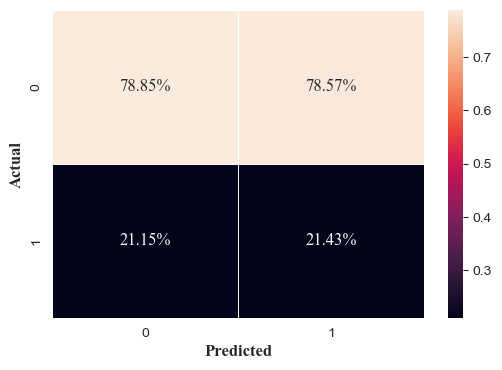

In [257]:
font = FontProperties(family='Times New Roman', size = 12, weight = 'bold')
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, prediction, normalize = 'pred'), fmt = '.2%', annot=True, linewidths=0.5, annot_kws={"fontsize": 12, 'family':'Times New Roman'})

# Add labels and title
plt.xlabel('Predicted', font = font)
plt.ylabel('Actual', font = font)
plt.savefig("./Figures/19_CM_simple_KNN.png", dpi = 300, bbox_inches = 'tight')
plt.show()

In [258]:
print(build_classification_rep(prediction, y_test))

\begin{table}[ht]
  \centering
  \caption{Classiication Report: Logistic Regression Model}
  \label{tab:6}
  \begin{tabular}{|c|c|c|c|c|c|}
    \hline
    \rule{0pt}{10pt}
    \textb{Class} & \textb{Precision} & \textb{Recall} & \textb{F1-Score} & \textbf{Support} \
    \hline
    \rule{0pt}{10pt}
     Good Client & 78.85\% & 96.85\% & 86.93\% & 1744 \
     Bad Client & 21.43\% & 3.21\% & 5.58\% & 468 \
    \hline
    \rule{0pt}{10pt}
    
     Accuracy & & & 77.03\% & 2212 \
     Macro Avg. & 50.14\% & 50.03\% & 46.25\% & 2212 \
     Weighted Avg. & 66.70\% & 77.03\% & 69.72\% & 2212 \
    
    \hline    
  \end{tabular}
  \vspace{10pt}
\end{table}


### Balancing Dataset

In [259]:
# scaling all features
from sklearn.preprocessing import MinMaxScaler
MMS = MinMaxScaler()
x_train_scaled = pd.DataFrame(MMS.fit_transform(x_train), columns=x_train.columns)
x_test_scaled = pd.DataFrame(MMS.transform(x_test), columns=x_test.columns)

In [342]:
# adding samples to minority class using SMOTE
from imblearn.over_sampling import SMOTE
oversample = SMOTE(sampling_strategy = 0.65, random_state = 69)

x_train_oversam, y_train_oversam = oversample.fit_resample(x_train, y_train)
x_test_oversam, y_test_oversam = oversample.fit_resample(x_test, y_test)

# after using SMOTE 
y_train_oversam.value_counts(normalize = True) * 100

0    60.609767
1    39.390233
Name: STATUS, dtype: float64

In [343]:
# Original majority and minority class
y_train.value_counts(normalize = True) * 100

0    78.430929
1    21.569071
Name: STATUS, dtype: float64

In [344]:
# K Nearest Neighbor classification
knn_model = KNeighborsClassifier(n_neighbors = 10)
knn_model.fit(x_train_oversam, y_train_oversam)

print('KNN Model Accuracy : ', knn_model.score(x_test_oversam, y_test_oversam)*100, '%')

prediction = knn_model.predict(x_test_oversam)
print('\nConfusion matrix :')
print(confusion_matrix(y_test_oversam, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test_oversam, prediction))

KNN Model Accuracy :  55.335418839068474 %

Confusion matrix :
[[1323  421]
 [ 864  269]]

Classification report:
              precision    recall  f1-score   support

           0       0.60      0.76      0.67      1744
           1       0.39      0.24      0.30      1133

    accuracy                           0.55      2877
   macro avg       0.50      0.50      0.48      2877
weighted avg       0.52      0.55      0.52      2877



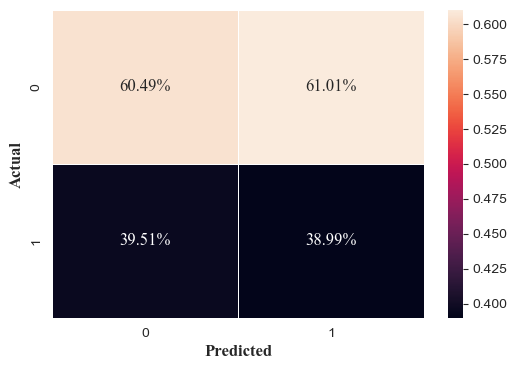

In [346]:
font = FontProperties(family='Times New Roman', size = 12, weight = 'bold')
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test_oversam, prediction, normalize = 'pred'), fmt = '.2%', annot=True, linewidths=0.5, annot_kws={"fontsize": 12, 'family':'Times New Roman'})

# Add labels and title
plt.xlabel('Predicted', font = font)
plt.ylabel('Actual', font = font)
plt.savefig("./Figures/21_CM_SMOTE_balanced.png", dpi = 300, bbox_inches = 'tight')
plt.show()

In [345]:
print(build_classification_rep(prediction, y_test_oversam))

\begin{table}[ht]
  \centering
  \caption{Classiication Report: Logistic Regression Model}
  \label{tab:6}
  \begin{tabular}{|c|c|c|c|c|c|}
    \hline
    \rule{0pt}{10pt}
    \textb{Class} & \textb{Precision} & \textb{Recall} & \textb{F1-Score} & \textbf{Support} \
    \hline
    \rule{0pt}{10pt}
     Good Client & 60.49\% & 75.86\% & 67.31\% & 1744 \
     Bad Client & 38.99\% & 23.74\% & 29.51\% & 1133 \
    \hline
    \rule{0pt}{10pt}
    
     Accuracy & & & 55.34\% & 2877 \
     Macro Avg. & 49.74\% & 49.80\% & 48.41\% & 2877 \
     Weighted Avg. & 52.02\% & 55.34\% & 52.43\% & 2877 \
    
    \hline    
  \end{tabular}
  \vspace{10pt}
\end{table}


Question: Why did the accuracy decreased while using SMOTE for balancing the dataset?

### Validation
#### K-Fold Cross Validation

In [318]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(5)

In [352]:
# # K Nearest Neighbor classification

# results=cross_val_score(knn_model, features, label, cv = kfold)
# print(results*100,'\n')

# print(np.mean(results)*100)

#### Stratified Shuffle Split

In [266]:
from sklearn.model_selection import StratifiedShuffleSplit
ssplit=StratifiedShuffleSplit(n_splits=5, test_size=0.20)

In [267]:
results=cross_val_score(knn_model,features,label,cv=ssplit)
print(results*100,'\n')

print(np.mean(results)*100)

[75.90415913 76.40144665 75.81374322 76.17540687 76.13019892] 

76.08499095840868


In [268]:
features.columns

Index(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'AGE_YEARS',
       'YEARS_EMPLOYED', 'CNT_FAM_MEMBERS'],
      dtype='object')

#### KNN with Random Weighting

In [275]:
import random
weights_list = []
for _ in range(12):
    weights_list.append(random.random())
len(weights_list)
print(weights_list)

[0.48694406114242006, 0.8807481936030949, 0.014370243489091106, 0.9691617280299055, 0.2196692685507855, 0.4095389570259358, 0.8109640093258436, 0.7943243622070151, 0.949609836273035, 0.1844913191265839, 0.4078788357295823, 0.06433577408543778]


In [276]:
clf_KNN = KNeighborsClassifier(metric_params = {'w': weights_list})
clf_KNN.fit(x_train, y_train)

KNeighborsClassifier(metric_params={'w': [0.48694406114242006,
                                          0.8807481936030949,
                                          0.014370243489091106,
                                          0.9691617280299055,
                                          0.2196692685507855,
                                          0.4095389570259358,
                                          0.8109640093258436,
                                          0.7943243622070151, 0.949609836273035,
                                          0.1844913191265839,
                                          0.4078788357295823,
                                          0.06433577408543778]})

In [277]:
print('KNN Model Accuracy : ', clf_KNN.score(x_test, y_test)*100, '%')

prediction = knn_model.predict(x_test)
print('\nConfusion matrix :')
print(confusion_matrix(y_test, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test, prediction))

KNN Model Accuracy :  74.72875226039784 %

Confusion matrix :
[[1744    0]
 [ 468    0]]

Classification report:
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1744
           1       0.00      0.00      0.00       468

    accuracy                           0.79      2212
   macro avg       0.39      0.50      0.44      2212
weighted avg       0.62      0.79      0.70      2212



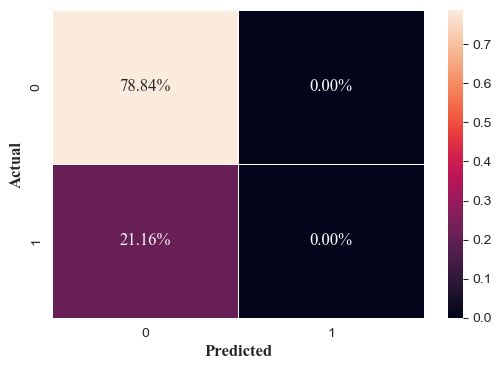

In [284]:
font = FontProperties(family='Times New Roman', size = 12, weight = 'bold')
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, prediction, normalize = 'pred'), fmt = '.2%', annot=True, linewidths=0.5, annot_kws={"fontsize": 12, 'family':'Times New Roman'})

# Add labels and title
plt.xlabel('Predicted', font = font)
plt.ylabel('Actual', font = font)
plt.savefig("./Figures/20_CM_weighted_KNN.png", dpi = 300, bbox_inches = 'tight')
plt.show()

In [278]:
features = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'AGE_YEARS',
       'YEARS_EMPLOYED', 'CNT_FAM_MEMBERS']
weighted = [0.2775000393397501, 0.34514382952446754, 0.03019638152758386, 0.5569195160369883, 4, 0.9607734156146648, 0.08218285220614585, 0.0731939869231566, 4, 0.09920635007728695, 0.2678344226623953, 0.774548695366705]

In [279]:
clf_KNN = KNeighborsClassifier(metric_params = {'w': weighted})
clf_KNN.fit(x_train, y_train)

print('KNN Model Accuracy : ', clf_KNN.score(x_test, y_test)*100, '%')

prediction = knn_model.predict(x_test)
print('\nConfusion matrix :')
print(confusion_matrix(y_test, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test, prediction))

KNN Model Accuracy :  74.59312839059675 %

Confusion matrix :
[[1744    0]
 [ 468    0]]

Classification report:
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1744
           1       0.00      0.00      0.00       468

    accuracy                           0.79      2212
   macro avg       0.39      0.50      0.44      2212
weighted avg       0.62      0.79      0.70      2212



#### BEST KNN Result, with neighbors = 10

In [347]:
from sklearn.model_selection import KFold, StratifiedKFold, GridSearchCV

KNN = KNeighborsClassifier() 

best_parameters = {'n_neighbors': np.arange(2, 12)}

# for information gain and entropy
model_entropy = GridSearchCV(estimator = KNN, param_grid = best_parameters, n_jobs = -1, verbose = 0, cv = StratifiedKFold(n_splits = 5, shuffle=True, random_state = 42))
model_entropy.fit(x_train, y_train)

print(model_entropy.best_params_)
print("Model accuracy score on Train set: ", model_entropy.best_score_)
y_pred = model_entropy.predict(x_test)
print(f"Accuracy after GridSearch & Stratified K-fold: ", accuracy_score(y_true = y_test, y_pred = y_pred))

{'n_neighbors': 10}
Model accuracy score on Train set:  0.7804655188382468
Accuracy after GridSearch & Stratified K-fold:  0.7870705244122965


In [349]:
clf_KNN = KNeighborsClassifier(n_neighbors = 10)
clf_KNN.fit(x_train, y_train)

print('KNN Model Accuracy : ', clf_KNN.score(x_test, y_test)*100, '%')

prediction = knn_model.predict(x_test)
print('\nConfusion matrix :')
print(confusion_matrix(y_test, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test, prediction))

KNN Model Accuracy :  78.70705244122965 %

Confusion matrix :
[[1323  421]
 [ 378   90]]

Classification report:
              precision    recall  f1-score   support

           0       0.78      0.76      0.77      1744
           1       0.18      0.19      0.18       468

    accuracy                           0.64      2212
   macro avg       0.48      0.48      0.48      2212
weighted avg       0.65      0.64      0.64      2212



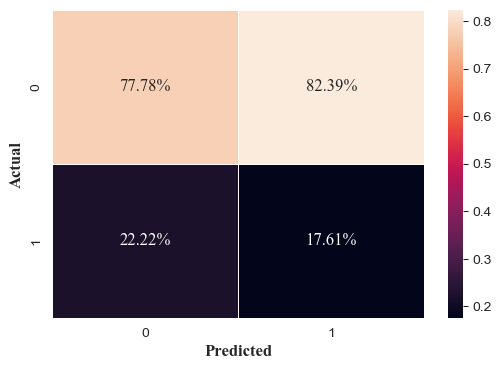

In [350]:
font = FontProperties(family='Times New Roman', size = 12, weight = 'bold')
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, prediction, normalize = 'pred'), fmt = '.2%', annot=True, linewidths=0.5, annot_kws={"fontsize": 12, 'family':'Times New Roman'})

# Add labels and title
plt.xlabel('Predicted', font = font)
plt.ylabel('Actual', font = font)
plt.savefig("./Figures/21_CM_best_KNN.png", dpi = 300, bbox_inches = 'tight')
plt.show()

In [351]:
print(build_classification_rep(prediction, y_test))

\begin{table}[ht]
  \centering
  \caption{Classiication Report: Logistic Regression Model}
  \label{tab:6}
  \begin{tabular}{|c|c|c|c|c|c|}
    \hline
    \rule{0pt}{10pt}
    \textb{Class} & \textb{Precision} & \textb{Recall} & \textb{F1-Score} & \textbf{Support} \
    \hline
    \rule{0pt}{10pt}
     Good Client & 77.78\% & 75.86\% & 76.81\% & 1744 \
     Bad Client & 17.61\% & 19.23\% & 18.39\% & 468 \
    \hline
    \rule{0pt}{10pt}
    
     Accuracy & & & 63.88\% & 2212 \
     Macro Avg. & 47.70\% & 47.55\% & 47.60\% & 2212 \
     Weighted Avg. & 65.05\% & 63.88\% & 64.45\% & 2212 \
    
    \hline    
  \end{tabular}
  \vspace{10pt}
\end{table}
